In [173]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [174]:
def cols_with_title_ingr(df):
    return [col for col in df.columns if '::' in col]


def cols_with_underscores(df):
    return [col for col in df.columns if col[0] == '_']


def cols_to_drop(df):
    return cols_with_underscores(df) + cols_with_title_ingr(df)


In [209]:
"""
Goal to train first on 20, then 30, then 40, and so forth and see how accuracy imporves
"""
user = 'james'
# classifier = RandomForestClassifier(random_state=0)

classifier = DecisionTreeClassifier(random_state=0)


def parse_user_csv(file_name):
    # print('reading csv from ' + file_name)
    try:
        df = pd.read_csv(file_name, index_col=0, header=None)
    except Exception as e:
        print(e)
        return dict()
    d = {}
    for k, v in df.T.to_dict('list').items():
        d[k] = v[0]
    return d

curr_prefs = parse_user_csv('users/user_' + user + '.csv')

data = pd.read_csv('data.csv')

/Users/jamesbuzaid/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: DataFrame columns are not unique, some columns will be omitted.


In [210]:
def random_classify(train_y, test_y):
    # try to predict test_y randomly
    pct_pos = len(np.where(train_y > 0)) / len(train_y)

    # how to calculate expected number of correct guesses

    expected_correct = 0
    for y in test_y:
        if y == 1:
            expected_correct += pct_pos
        else:
            expected_correct += (1 - pct_pos)

    return expected_correct / len(test_y)

In [211]:
def train(train_X, train_y):
    return classifier.fit(train_X, train_y)

In [212]:
observed = data.loc[curr_prefs.keys()]
ys = pd.Series(curr_prefs)

observed = observed.drop(
    columns=cols_to_drop(observed)).drop(columns=['website'])


accuracy_measurements = {}
rand_accuracy = {}

In [213]:
idx = 10, 20, 40, 60, 80, 100, 120

for i in idx:
    train_X = observed.iloc[:i].to_numpy()
    train_y = ys.iloc[:i].to_numpy()

    test_X = observed.iloc[i:i+50].to_numpy()
    test_y = ys.iloc[i:i+50].to_numpy()

    clf = train(train_X, train_y)
    actual_acc = clf.score(test_X, test_y)
    expected_random_acc = random_classify(train_y, test_y)

    accuracy_measurements[i] = actual_acc
    rand_accuracy[i] = expected_random_acc

accuracy_measurements = pd.Series(accuracy_measurements)
print(accuracy_measurements)
rand_accuracy = pd.Series(rand_accuracy)

10     0.60
20     0.56
40     0.52
60     0.50
80     0.48
100    0.50
120    0.56
dtype: float64


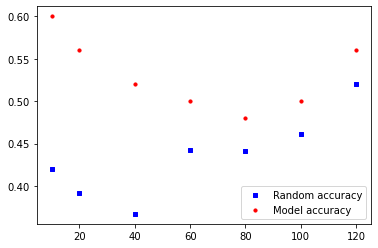

In [214]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

acc = list(accuracy_measurements)
rand_acc = list(rand_accuracy)
idx = idx 

ax1.scatter(idx, rand_acc, s = 10, c = 'b', marker= 's', label = 'Random accuracy')
ax1.scatter(idx, acc, s=10, c='r', marker="o", label='Model accuracy')
plt.legend(loc = 'lower right')
plt.show()
# fig.savefig('test2png.png', dpi=100)
